# Filter ibtracs

In [18]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut
import pandas as pd

In [ ]:
min_year = 1980
hours = ["00", "06", "12", "18"]

ut.filter_tracks(min_year=min_year, hours=hours)

In [2]:
import pickle

with open("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/valid_dates_1980_00_06_12_18.pkl", "rb") as fi:
    valid_dates = pickle.load(fi)
valid_dates["2020"]["04"]

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '25',
 '26',
 '27']

# Write params

In [ ]:
# write 6 months of data into input params

ut.write_params_for_period(output_path="/users/lpoulain/louis/TCBench_0.1/input_params/", start_date="20200301", end_date="20200831", max_lead=168, step=12, debug=False)

In [1]:
%load_ext autoreload
%autoreload 2

import scripts.utils as ut
import pandas as pd
tc_id = "2005236N23285"
#tc_id = "2000185N15117"
path = "/users/lpoulain/louis/TCBench_0.1/input_params"
df = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv",
                 dtype="string", na_filter=False)
ut.write_params_for_tc(f"{path}/{2005}/", df, TC_id=tc_id, season="2005", step=6, max_lead=6, debug=False)

In [ ]:
# take one tc/basin for several seasons and writes params

%load_ext autoreload
%autoreload 2
import scripts.utils as ut

seasons = ["2008", "2023"]	
ut.write_several_seasons(output_path=f"./input_params/", seasons=seasons, step=6, max_lead=168, 
                          ibtracs_path='/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/ibtracs.ALL.list.v04r00.csv',
                          as_range=True)

## Distance calculator

In [ ]:
step = 6 # one week
max_dist = ut.max_historical_distance_within_step(df, step)

1/5975
597/5975
1194/5975
1791/5975
2388/5975
2985/5975
3582/5975
4179/5975
4776/5975
5373/5975
5970/5975
Max dist: 645.3430433993034km (TC 2013167N12128, idx [54, 649123]).


1160.8241250016658 711.5864254399107


Text(0.5, 1.0, 'Distribution of distances traveled by TCs during a week\nMax: 6134.251 km, Mean: 1160.824 km, Std: 711.586 km')

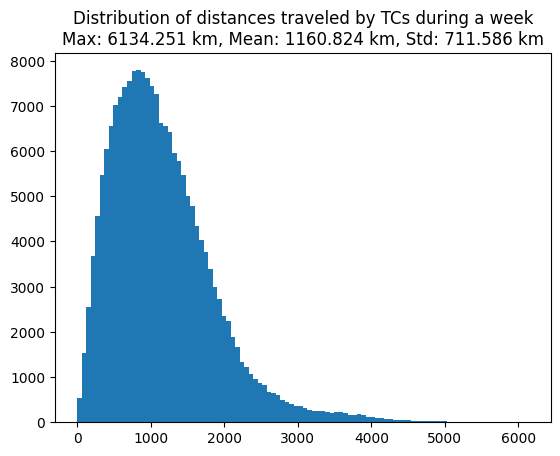

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
"""
d6 = np.load("./6h_dists.npy")
print(np.mean(d), np.std(d))
print([np.count_nonzero(d>dmax) for dmax in [400, 600, 800, 1000, 1200, 1400]])
plt.figure()
_, _, _ = plt.hist(d[d>400], bins=100)
"""	
d168 = np.load("./168h_dists.npy")
print(np.mean(d168), np.std(d168))
plt.figure()
_, _, _ = plt.hist(d168, bins=100)
plt.title("Distribution of distances traveled by TCs during a week"+f"\nMax: {np.max(d168):.3f} km, Mean: {np.mean(d168):.3f} km, Std: {np.std(d168):.3f} km")

Text(0.5, 1.0, 'Max dist: 6613.037 km,\n Mean: 897.536 km, Std: 695.732 km')

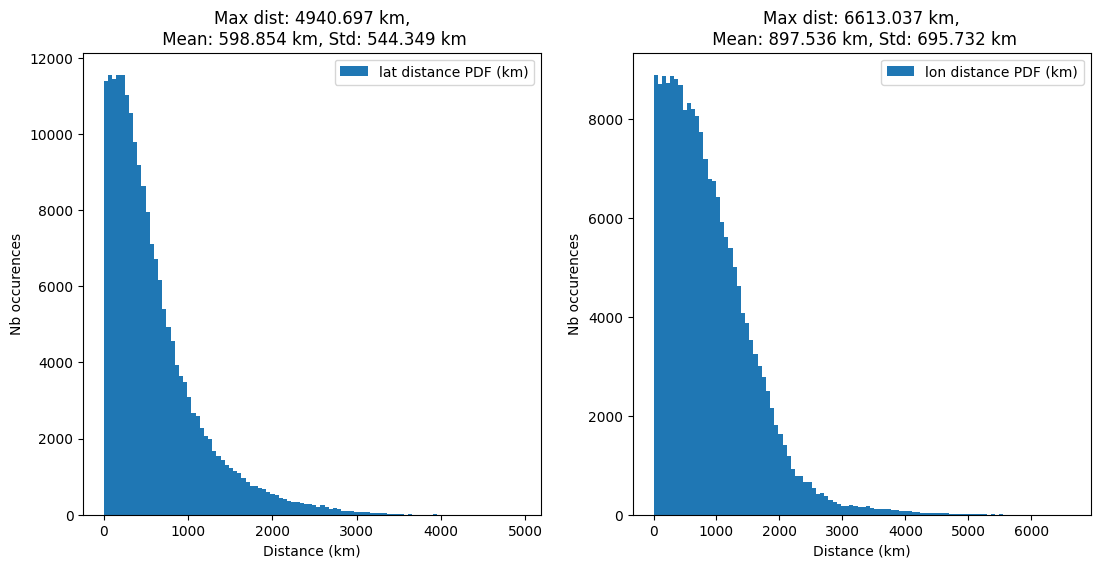

In [ ]:
d168_lat = np.load("./168h_dists_lats.npy")
d168_lon = np.load("./168h_dists_lons.npy")

fig, axs = plt.subplots(1, 2, figsize=(13, 6))
ax1, ax2 = axs
ax1.hist(d168_lat, bins=100, label="lat distance PDF (km)")
ax1.set_title(f"Max dist: {d168_lat.max():.3f} km,\n Mean: {np.mean(d168_lat):.3f} km, Std: {np.std(d168_lat):.3f} km")
ax1.set_xlabel("Distance (km)")
ax1.set_ylabel("Nb occurences")
ax1.legend()

ax2.hist(d168_lon, bins=100, label="lon distance PDF (km)")
ax2.set_xlabel("Distance (km)")
ax2.set_ylabel("Nb occurences")
ax2.legend()
ax2.set_title(f"Max dist: {d168_lon.max():.3f} km,\n Mean: {np.mean(d168_lon):.3f} km, Std: {np.std(d168_lon):.3f} km")

# Combine predictions

## OLD COMBINE

In [ ]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

ut.combine_in_series(output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model_name="graphcast", remove_old=True, start_in="2008-09-29")

In [30]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
model_name = "fourcastnetv2"
years = ["2007", "2008", "2009", "2010", "2011", "2019", "2020"]

ut.fast_rename(path, model_name, years=years)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## "Rename" with TC_id

In [4]:
%load_ext autoreload
%autoreload 2
import scripts.utils as ut

model = "graphcast"

ut.renaming(folder_name="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                    model=model, remove_old=False, cut=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-03-10T00_to_2000-03-14T00_ldt_96.nc
1/1: 2000-03-10T00 to 2000-03-14T00
Model: graphcast

2000-03-10T00 to 2000-03-14T00 (96h) - 1/1
!!! Removing 1 old files !!! 15s to STOP if this is a mistake


# Save small regions

In [ ]:
"""from scripts import utils as ut
import pandas as pd
import xarray as xr
import numpy as np
%load_ext autoreload
%autoreload 2

ds_path = "/scratch/lpoulain/panguweather/pangu_d_20180913_t_0600_lt_6-144h.nc"
path = "/work/FAC/FGSE/IDYST/tbeucler/default/milton/repos/alpha_bench/tracks/ibtracs/"
ibtracs_df = pd.read_csv(path + 'ibtracs.ALL.list.v04r00.csv', dtype="string").loc[1:]"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#ut.cut_and_save_rect(ds_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     date_start="2019-11-22T00", date_end="2019-11-29T00", lead_time=168, df_tracks=ibtracs_df, 
#                     output_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
#                     tc_id="2019326S08163")

In [2]:
from scripts import utils as ut
import xarray as xr
import glob
%load_ext autoreload
%autoreload 2
ds_folder = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
output_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
ut.cut_save_in_series(ds_folder=ds_folder, models=["graphcast"],
                      output_path=output_path, parallel=False, remove=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Model: graphcast

2000-02-25T06 to 2000-03-03T06 (168h) - 25/626
2000-02-25T12 to 2000-02-26T12 (24h) - 26/626
2000-02-25T12 to 2000-02-26T12 (24h) - 27/626
2000-02-25T12 to 2000-02-26T12 (24h) - 28/626
2000-02-25T12 to 2000-02-26T12 (24h) - 29/626
2000-02-25T12 to 2000-02-29T12 (96h) - 30/626
2000-02-25T12 to 2000-02-29T12 (96h) - 31/626
2000-02-25T12 to 2000-02-29T12 (96h) - 32/626
2000-02-25T12 to 2000-03-03T00 (156h) - 33/626
2000-02-25T12 to 2000-03-03T00 (156h) - 34/626
2000-02-25T12 to 2000-03-03T12 (168h) - 35/626
2000-02-25T18 to 2000-02-26T12 (18h) - 36/626
2000-02-25T18 to 2000-02-26T12 (18h) - 37/626
2000-02-25T18 to 2000-02-26T12 (18h) - 38/626
2000-02-25T18 to 2000-02-26T12 (18h) - 39/626
2000-02-25T18 to 2000-02-29T12 (90h) - 40/626
2000-02-25T18 to 2000-02-29T12 (90h) - 41/626
2000-02-25T18 to 2000-02-29T12 (90h) - 42/626
2000-02-25T18 to 2000-03-03T00 (150h) - 43/626
2000-02-25T18 t

In [3]:
xr.open_dataset('/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2002-01-25T12_to_2002-01-28T12_ldt_72_2002017S07078_small.nc')

OSError: [Errno -101] NetCDF: HDF error: '/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2002-01-25T12_to_2002-01-28T12_ldt_72_2002017S07078_small.nc'

In [15]:
import xarray as xr
import numpy as np
ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2008-03-26T18_to_2008-03-31T12_ldt_114_2008079S12069_small.nc")
ds2 = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2008-03-26T18_to_2008-03-31T12_ldt_114_2008079S12069.nc")
ds2_tmp = ds2.sel(latitude=slice(ds.latitude.max(), ds.latitude.min()), longitude=slice(ds.longitude.min(), ds.longitude.max()))
for var in ds.data_vars:
    print(var, np.count_nonzero(ds[var].values!=ds2_tmp[var].values))

t2m 58081
msl 58081
t 755053
z 755053
u 755053
v 755053
w 755053
q 755053
heightAboveGround 0
u10 0
v10 0
surface 0
tp 1045458


In [9]:
ds2_tmp

<xarray.Dataset>
Dimensions:            (time: 19, latitude: 241, longitude: 241,
                        isobaricInhPa: 13)
Coordinates:
  * time               (time) datetime64[ns] 2008-03-27 ... 2008-03-31T12:00:00
  * latitude           (latitude) float64 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude          (longitude) float64 38.5 38.75 39.0 ... 98.0 98.25 98.5
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables: (12/13)
    t2m                (time, latitude, longitude) float32 287.6 288.0 ... 293.2
    msl                (time, latitude, longitude) float32 1.009e+05 ... 1.01...
    t                  (time, isobaricInhPa, latitude, longitude) float32 291...
    z                  (time, isobaricInhPa, latitude, longitude) float32 725...
    u                  (time, isobaricInhPa, latitude, longitude) float32 3.5...
    v                  (time, isobaricInhPa, latitude, longitude) float32 -5....
    ...                 ...
    q                  (time, isobaricInhPa, latitude, longitude) float32 0.0...
    heightAboveGround  float64 10.0
    u10                (time, latitude, longitude) float32 3.504 ... -4.337
    v10                (time, latitude, longitude) float32 -5.559 ... 4.299
    surface            float64 0.0
    tp                 (time, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-28T15:57 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
ds

<xarray.Dataset>
Dimensions:            (time: 19, latitude: 241, longitude: 241,
                        isobaricInhPa: 13)
Coordinates:
  * time               (time) datetime64[ns] 2008-03-27 ... 2008-03-31T12:00:00
  * latitude           (latitude) float64 30.0 29.75 29.5 ... -29.5 -29.75 -30.0
  * longitude          (longitude) float64 38.5 38.75 39.0 ... 98.0 98.25 98.5
  * isobaricInhPa      (isobaricInhPa) float64 1e+03 925.0 850.0 ... 100.0 50.0
Data variables: (12/13)
    t2m                (time, latitude, longitude) float32 287.6 288.0 ... 293.2
    msl                (time, latitude, longitude) float32 ...
    t                  (time, isobaricInhPa, latitude, longitude) float32 ...
    z                  (time, isobaricInhPa, latitude, longitude) float32 ...
    u                  (time, isobaricInhPa, latitude, longitude) float32 ...
    v                  (time, isobaricInhPa, latitude, longitude) float32 ...
    ...                 ...
    q                  (time, isobaricInhPa, latitude, longitude) float32 ...
    heightAboveGround  float64 ...
    u10                (time, latitude, longitude) float32 ...
    v10                (time, latitude, longitude) float32 ...
    surface            float64 ...
    tp                 (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-12-28T15:57 GRIB to CDM+CF via cfgrib-0.9.1...

# Create Dataset

In [1]:
from dataset import create_dataset
from scripts import utils as ut
import xarray as xr
import numpy as np
import pandas as pd
import glob
%load_ext autoreload
%autoreload 2

df_tracks = pd.read_csv("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/ERA5/TC_track_filtered_1980_00_06_12_18.csv", 
                        dtype="string", na_filter=False)

In [2]:
model = "graphcast"
model_folder = "panguweather" if model=="pangu" else model
tc_ids = np.unique([ut.get_tc_id_nc(file) for file in glob.glob(f"/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/{model_folder}/{model}*_small.nc")])
print(tc_ids)

['1999343S09095' '1999343S11123' '1999348N12115' '1999357S08076'
 '2000003S13082' '2000006S15164' '2000019S11127' '2000023S15172'
 '2000024S12100' '2000025S15056' '2000031S11074' '2000032S11116'
 '2000050S13078' '2000055S23227' '2000056S17152' '2000058S14063'
 '2000060S12086' '2000060S17123' '2000064S19209' '2000067S15189'
 '2000075S17119' '2000083S17102' '2000089S20168' '2000091S14156'
 '2000102S13128' '2000105S09127' '2000125N06136' '2000139N18122'
 '2000141N18116' '2000141N24130' '2000142N12262' '2000150N11117'
 '2000160N21267' '2000164N12256' '2000170N10268' '2000175N09340'
 '2000184N13133' '2000185N15117' '2000187N12245' '2000193N10131'
 '2000196N16122' '2000199N20145' '2000201N11224' '2000202N12131'
 '2000203N17249' '2000205N10260' '2000206N11266' '2000209N06182'
 '2000214N22155' '2000214S06080' '2000215N15254' '2000217N11342'
 '2000217N12260' '2000220N24149' '2000222N14143' '2000222N28286'
 '2000223N18257' '2000226N16258' '2000227N23267' '2000228N31180'
 '2000230N08139' '2000230

In [3]:
tc_ids = [tc_id for tc_id in tc_ids if int(tc_id[:4])<2006]

In [4]:
vars = {"msl":[0], "u10":[0], "v10":[0]}
create_dataset(data_folder="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/", model_name=model, 
                       tc_ids=tc_ids, df_tracks=df_tracks, vars=vars, size=241)

['msl', 'u10', 'v10']


# Tests

In [3]:
import xarray as xr

ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2005-08-24T00_to_2005-08-24T06_ldt_6.nc")
xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/panguweather/pangu_2005-08-24T00_to_2005-08-24T06_ldt_6.nc")

<xarray.Dataset>
Dimensions:        (lon: 1440, lat: 721, time: 1, isobaricInhPa: 13)
Coordinates:
  * lon            (lon) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time           (time) datetime64[ns] 2005-08-24T06:00:00
  * isobaricInhPa  (isobaricInhPa) int64 50 100 150 200 250 ... 700 850 925 1000
Data variables:
    msl            (time, lat, lon) float32 ...
    u10            (time, lat, lon) float32 ...
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...

In [2]:
ds

<xarray.Dataset>
Dimensions:        (time: 1, lat: 721, lon: 1440, isobaricInhPa: 13)
Coordinates:
  * time           (time) timedelta64[ns] 06:00:00
  * lon            (lon) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * isobaricInhPa  (isobaricInhPa) float64 50.0 100.0 150.0 ... 925.0 1e+03
Data variables:
    u10            (time, lat, lon) float32 ...
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    msl            (time, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...
    w              (time, isobaricInhPa, lat, lon) float32 ...

In [5]:
ds2

<xarray.Dataset>
Dimensions:        (lon: 1440, lat: 721, time: 1, isobaricInhPa: 13)
Coordinates:
  * lon            (lon) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat            (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * time           (time) datetime64[ns] 2005-08-24T06:00:00
  * isobaricInhPa  (isobaricInhPa) int64 50 100 150 200 250 ... 700 850 925 1000
Data variables:
    msl            (time, lat, lon) float32 ...
    u10            (time, lat, lon) float32 ...
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...

In [1]:
import xarray as xr 

xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/fourcastnetv2/fourcastnetv2_2005-08-23T18_to_2005-08-24T00_ldt_6.nc")

<xarray.Dataset>
Dimensions:                        (lat: 721, lon: 1440, channel: 73, time: 2,
                                    history: 1)
Coordinates:
  * lat                            (lat) float64 90.0 89.75 ... -89.75 -90.0
  * lon                            (lon) float64 0.0 0.25 0.5 ... 359.5 359.8
  * channel                        (channel) object 'u10m' 'v10m' ... 'r1000'
  * time                           (time) datetime64[ns] 2005-08-23T18:00:00 ...
Dimensions without coordinates: history
Data variables:
    __xarray_dataarray_variable__  (time, history, channel, lat, lon) float32 ...

In [8]:
ds.u10.values[0,0,0], ds2.u10.values[0,-1,0], ds2.u10.values[0,0,0]

(0.22941257, -0.290169, 1.8972367)

In [13]:
import numpy as np
ds2 = ds.sel(lat=np.arange(30, -25.25, -0.25))
print(ds2.u10.values[0,0,0], ds2.u10.values[0,-1,0], ds.u10.values[0,0,0])

1.0898807 -5.6868277 1.0898807


In [14]:
ds

<xarray.Dataset>
Dimensions:        (time: 28, lon: 241, lat: 241, isobaricInhPa: 13)
Coordinates:
  * time           (time) timedelta64[ns] 0 days 06:00:00 ... 7 days 00:00:00
  * lon            (lon) float64 65.25 65.5 65.75 66.0 ... 124.8 125.0 125.2
  * lat            (lat) float64 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * isobaricInhPa  (isobaricInhPa) float64 50.0 100.0 150.0 ... 925.0 1e+03
Data variables:
    u10            (time, lat, lon) float32 1.09 1.036 0.9741 ... 4.225 4.399
    v10            (time, lat, lon) float32 ...
    t2m            (time, lat, lon) float32 ...
    z              (time, isobaricInhPa, lat, lon) float32 ...
    msl            (time, lat, lon) float32 ...
    q              (time, isobaricInhPa, lat, lon) float32 ...
    t              (time, isobaricInhPa, lat, lon) float32 ...
    tp             (time, lat, lon) float32 ...
    u              (time, isobaricInhPa, lat, lon) float32 ...
    v              (time, isobaricInhPa, lat, lon) float32 ...
    w              (time, isobaricInhPa, lat, lon) float32 ...